# Capstone Two: Exploratory Data Analysis

# 1.Background

Therapeutic antibodies are very important biopharmaceutics for cancers and autoimmune diseases. However, some antibodies cannot be developed and manufactured due to low stability and high aggregation of antibodies. The capstone project is to build a model predict the developability of antibodies so that the model can guide the pipelines of the development of antibodies and reduce the investment risks.

# 2.Import Modules


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# 3.Load Dataset

In the last project "capstone two data wrangling", the data has been cleaned and separate into theree main columns, including heavy chain, light chain, and label.

In [2]:
df = pd.read_csv('Antibody.csv',index_col=0)
df.head()

,heavy,light,developability
0,EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKGLE...,DIVMTQSQKFMSTSVGDRVSITCKASQNVGTAVAWYQQKPGQSPKL...,0
1,EVQLQQSGAELVKPGASVKLSCTASGFNIKDTYMHWVKQKPEQGLE...,DIVLTQSPAIMSASLGERVTMTCTASSSVSSSNLHWYQQKPGSSPK...,0
2,EVQLQESDAELVKPGASVKISCKASGYTFTDHVIHWVKQKPEQGLE...,DIELTQSPSSLSASLGGKVTITCKASQDIKKYIGWYQHKPGKQPRL...,1
3,QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQGLE...,DIELTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQNPDGTVKL...,0
4,QVQLQESGPGLVAPSQSLSITCTVSGFSLTGYGVNWVRQPPGKGLE...,DIVLTQSPASLSASVGETVTITCRASGNIHNYLAWYQQKQGKSPQL...,0


Antibody have 4 chains of amino acids, namely two identical heavy chains and two identical light chains. Each character represents a type of amino acid. These characters include A, R, N, D, C, E, Q, G, H, I, L, K, M, F, P, S, T, W, Y, and V.

In [3]:
df.columns = ['heavy','light','developability']
df.head()
df.to_csv('Antibody.csv')

# 4.Basic Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1592 entries, 0 to 2408
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   heavy           1592 non-null   object
 1   light           1592 non-null   object
 2   developability  1592 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 49.8+ KB


Ideally, the research is to estimate the developability by the amino acid sequence of heavy chain and light chain, which is very hard currently through the traditional method based on computational chemistry. 

Hevay and light are text type. Develpability is categorical variable. 

In [5]:
df.describe()

,developability
count,1592.000000
mean,0.213568
std,0.409954
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
df.nunique()

heavy             1488
light             1411
developability       2
dtype: int64

Since we have 1592 observations but only 1488 unique heavy chain and 1411 unique light chain, there are some antibodies have either same heavy chian or same light chain. In the last project, the repeated results have been removed.

Text(0, 0.5, 'Observations of antibodies')

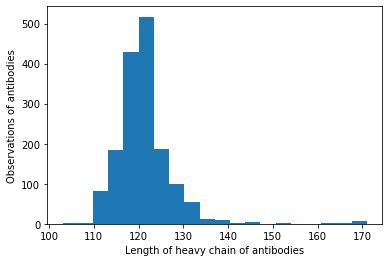

In [7]:
_ = df.heavy.str.len().plot(kind='hist',bins=20)
df['heavylength'] = df.heavy.str.len()
plt.xlabel('Length of heavy chain of antibodies')
plt.ylabel('Observations of antibodies')

Text(0, 0.5, 'Observations of antibodies')

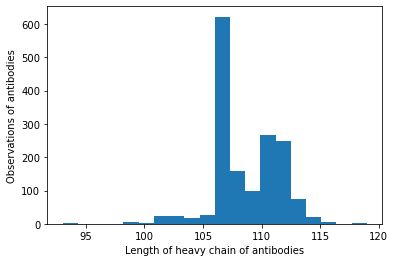

In [8]:
_ = df.light.str.len().plot(kind='hist',bins=20)
df['lightlength'] = df.light.str.len()
plt.xlabel('Length of heavy chain of antibodies')
plt.ylabel('Observations of antibodies')

It is clear to see that most light chains are shorter than the heavy chain, same as the biological knowledge.

# 5.Count Occurrences of Amino Acids in Different Chains

In [9]:
from collections import Counter

In [10]:
df['heavy'].iloc[0]

'EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKGLEWIGWIDPEIGDTEYVPKFQGKATMTADTSSNTAYLQLSSLTSEDTAVYYCNAGHDYDRGRFPYWGQGTLVTVSA'

In [11]:
count = Counter(df['heavy'].iloc[0])
count

Counter({'E': 7,
         'V': 9,
         'Q': 7,
         'L': 7,
         'S': 11,
         'G': 11,
         'A': 9,
         'R': 4,
         'K': 6,
         'C': 2,
         'T': 10,
         'F': 3,
         'N': 3,
         'I': 5,
         'D': 7,
         'Y': 8,
         'H': 2,
         'W': 4,
         'P': 4,
         'M': 1})

In [12]:
AAseq = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']

Count the the occurence and percentage of each amino acid in heavy chain and light chain.

In [13]:
for i in AAseq:
    df['H_'+i] = df['heavy'].apply(lambda x: Counter(x)[i])
    df['H_'+i+'_percent'] = df['heavy'].apply(lambda x: Counter(x)[i])/df['heavylength']
    df['L_'+i] = df['light'].apply(lambda x: Counter(x)[i])
    df['L_'+i+'_percent'] = df['light'].apply(lambda x: Counter(x)[i])/df['lightlength']

In [14]:
df.head()

,heavy,light,developability,heavylength,lightlength,H_A,H_A_percent,L_A,L_A_percent,H_C,...,L_V,L_V_percent,H_W,H_W_percent,L_W,L_W_percent,H_Y,H_Y_percent,L_Y,L_Y_percent
0,EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKGLE...,DIVMTQSQKFMSTSVGDRVSITCKASQNVGTAVAWYQQKPGQSPKL...,0,120,107,9,0.075000,6,0.056075,2,...,6,0.056075,4,0.033333,1,0.009346,8,0.066667,6,0.056075
1,EVQLQQSGAELVKPGASVKLSCTASGFNIKDTYMHWVKQKPEQGLE...,DIVLTQSPAIMSASLGERVTMTCTASSSVSSSNLHWYQQKPGSSPK...,0,119,108,11,0.092437,8,0.074074,2,...,4,0.037037,3,0.025210,2,0.018519,8,0.067227,7,0.064815
2,EVQLQESDAELVKPGASVKISCKASGYTFTDHVIHWVKQKPEQGLE...,DIELTQSPSSLSASLGGKVTITCKASQDIKKYIGWYQHKPGKQPRL...,1,119,106,7,0.058824,3,0.028302,2,...,1,0.009434,3,0.025210,1,0.009434,8,0.067227,8,0.075472
3,QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQGLE...,DIELTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQNPDGTVKL...,0,120,102,8,0.066667,3,0.029412,2,...,3,0.029412,3,0.025000,1,0.009804,11,0.091667,6,0.058824
4,QVQLQESGPGLVAPSQSLSITCTVSGFSLTGYGVNWVRQPPGKGLE...,DIVLTQSPASLSASVGETVTITCRASGNIHNYLAWYQQKQGKSPQL...,0,116,107,4,0.034483,5,0.046729,2,...,5,0.046729,4,0.034483,2,0.018692,6,0.051724,7,0.065421


In [15]:
df.describe()

,developability,heavylength,lightlength,H_A,H_A_percent,L_A,L_A_percent,H_C,H_C_percent,L_C,...,L_V,L_V_percent,H_W,H_W_percent,L_W,L_W_percent,H_Y,H_Y_percent,L_Y,L_Y_percent
count,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,...,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000
mean,0.213568,121.033291,108.711055,7.596734,0.062755,5.927764,0.054652,2.140704,0.017612,2.059045,...,5.905779,0.054172,3.981784,0.032897,1.590452,0.014648,7.970477,0.065896,5.613065,0.051669
std,0.409954,6.103921,2.758802,2.430053,0.019976,2.326938,0.021557,0.644311,0.004191,0.319539,...,2.026206,0.018181,0.915153,0.007313,0.687947,0.006373,2.116591,0.017253,1.432681,0.013247
min,0.000000,103.000000,93.000000,1.000000,0.008850,1.000000,0.008929,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.014815,0.000000,0.000000,3.000000,0.022556,1.000000,0.009174
25%,0.000000,118.000000,107.000000,6.000000,0.050000,4.000000,0.037383,2.000000,0.016393,2.000000,...,4.000000,0.037383,3.000000,0.025424,1.000000,0.009259,7.000000,0.053030,5.000000,0.044643
50%,0.000000,120.000000,108.000000,8.000000,0.063278,6.000000,0.056075,2.000000,0.016667,2.000000,...,6.000000,0.054545,4.000000,0.033333,1.000000,0.009615,8.000000,0.066116,6.000000,0.053571
75%,0.000000,123.000000,111.000000,9.000000,0.075630,7.000000,0.067308,2.000000,0.017094,2.000000,...,7.000000,0.065421,4.000000,0.035556,2.000000,0.018692,9.000000,0.076923,6.000000,0.058252
max,1.000000,171.000000,119.000000,31.000000,0.264957,24.000000,0.224299,10.000000,0.058480,6.000000,...,12.000000,0.113208,8.000000,0.060150,4.000000,0.038095,16.000000,0.126984,10.000000,0.093458


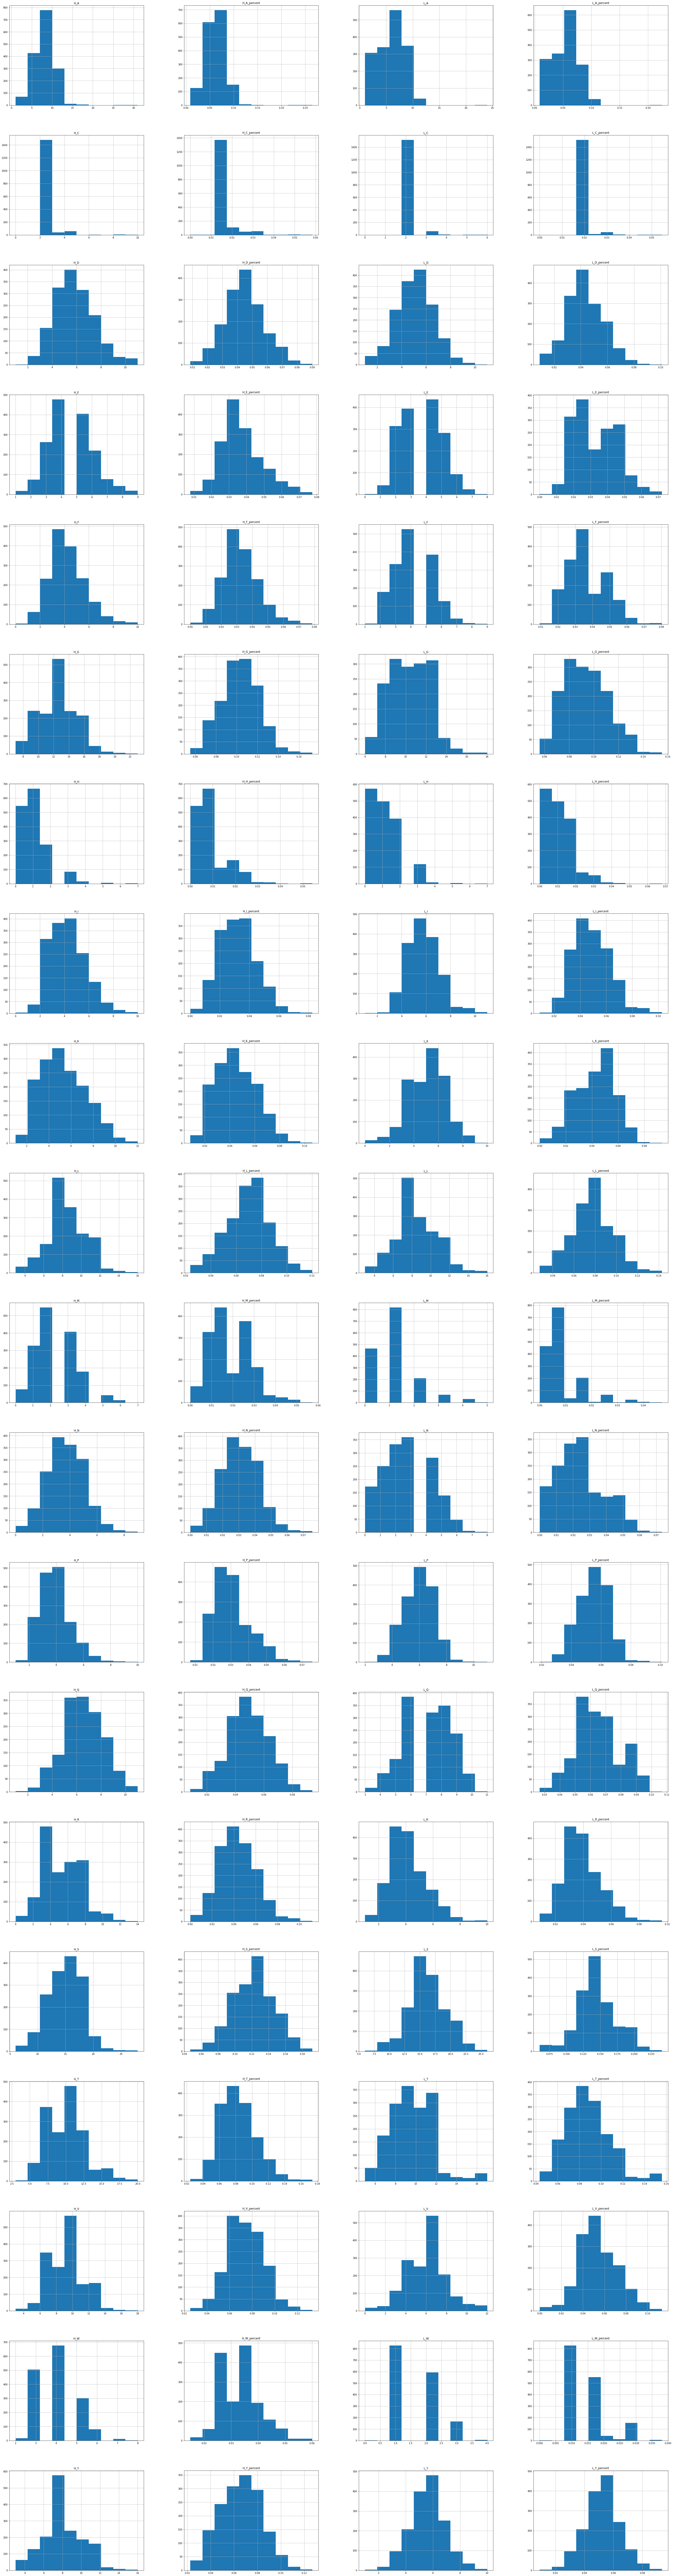

In [16]:
_ = df.loc[:,  ~df.columns.isin(['developability', 'heavylength','lightlength'])].hist(figsize=(50,200),layout=(20,4))

# 6.Comparison of Occurrences of Amino Acids in Different Chains

The occurrence of amino acids in antibody may influence the developability. So it is important to check the distribution of occurences of each amino acids in developable and undevelopable antibody.

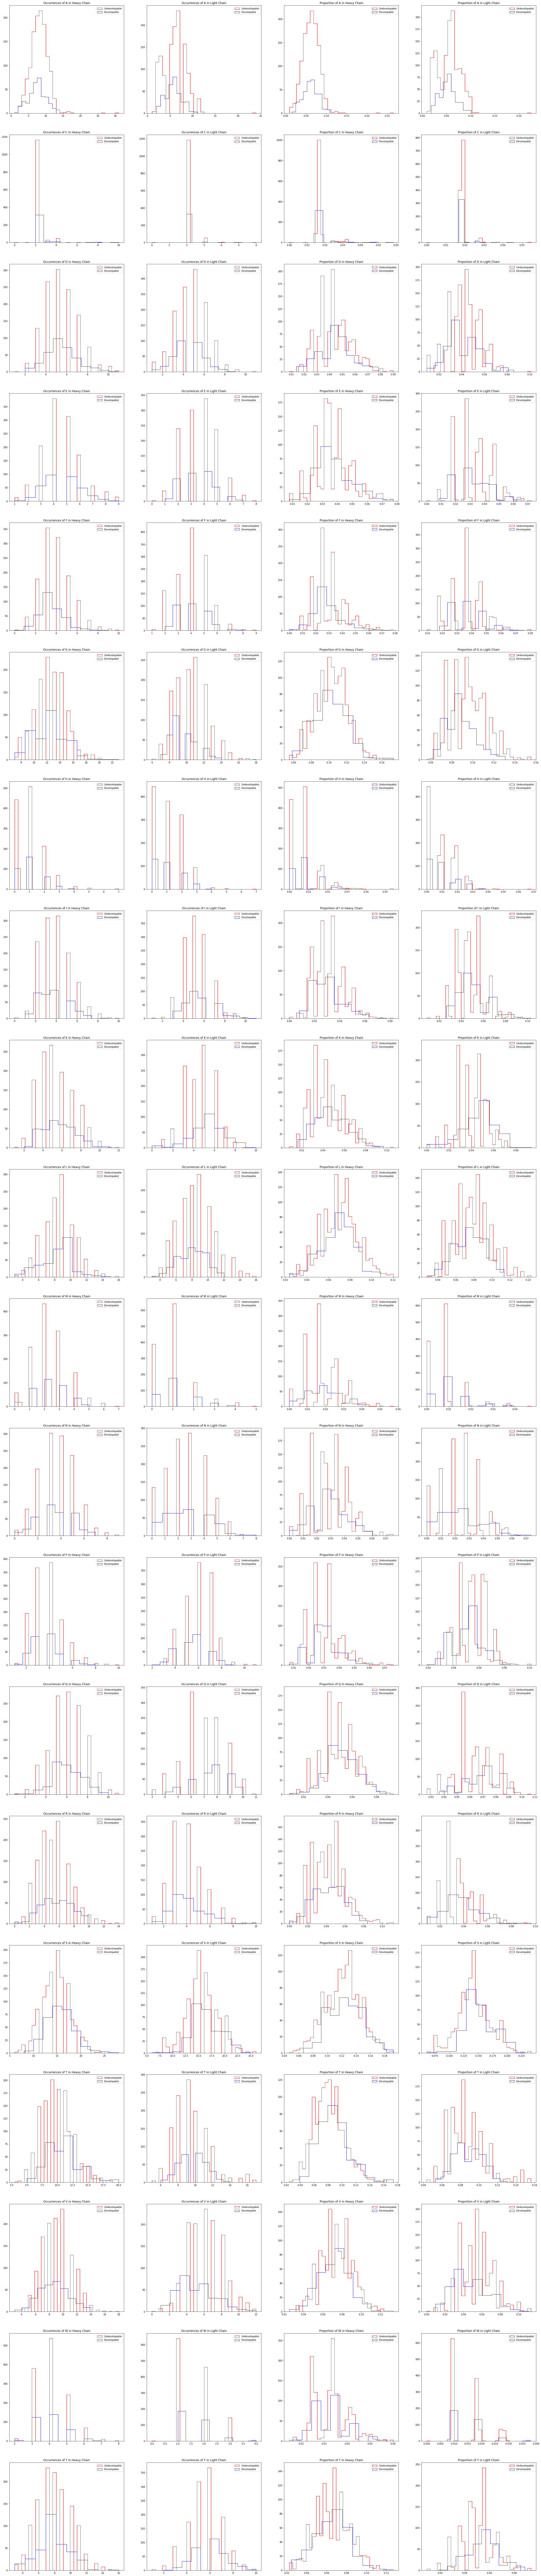

In [17]:
fig, ax = plt.subplots(20,4,figsize=(40,200))
for j, i in enumerate(AAseq):
    ax[j,0].hist(df.loc[df['developability']==0,'H_'+i],histtype='step',color='red',label='Undevelopable',bins=30)
    ax[j,0].hist(df.loc[df['developability']==1,'H_'+i],histtype='step',color='blue',label='Developable')
    ax[j,0].set_title("Occurrences of "+i+" in Heavy Chain")
    ax[j,0].legend(["Undevelopable", "Developable"], loc ="upper right")

    ax[j,1].hist(df.loc[df['developability']==0,'L_'+i],histtype='step',color='red',label='Undevelopable',bins=30)
    ax[j,1].hist(df.loc[df['developability']==1,'L_'+i],histtype='step',color='blue',label='Developable')
    ax[j,1].set_title('Occurrences of '+i+' in Light Chain')
    ax[j,1].legend(["Undevelopable", "Developable"], loc ="upper right")

    ax[j,2].hist(df.loc[df['developability']==0,'H_'+i+'_percent'],histtype='step',color='red',label='Undevelopable',bins=30)
    ax[j,2].hist(df.loc[df['developability']==1,'H_'+i+'_percent'],histtype='step',color='blue',label='Developable')
    ax[j,2].set_title('Proportion of '+i+' in Heavy Chain')
    ax[j,2].legend(["Undevelopable", "Developable"], loc ="upper right")

    ax[j,3].hist(df.loc[df['developability']==0,'L_'+i+'_percent'],histtype='step',color='red',label='Undevelopable',bins=30)
    ax[j,3].hist(df.loc[df['developability']==1,'L_'+i+'_percent'],histtype='step',color='blue',label='Developable')
    ax[j,3].set_title('Proportion of '+i+' in Light Chain')
    ax[j,3].legend(["Undevelopable", "Developable"], loc ="upper right")

The red line (undevelopable) is higher than blue line (developable) beacuase we have about 70% data are undevelopable. 

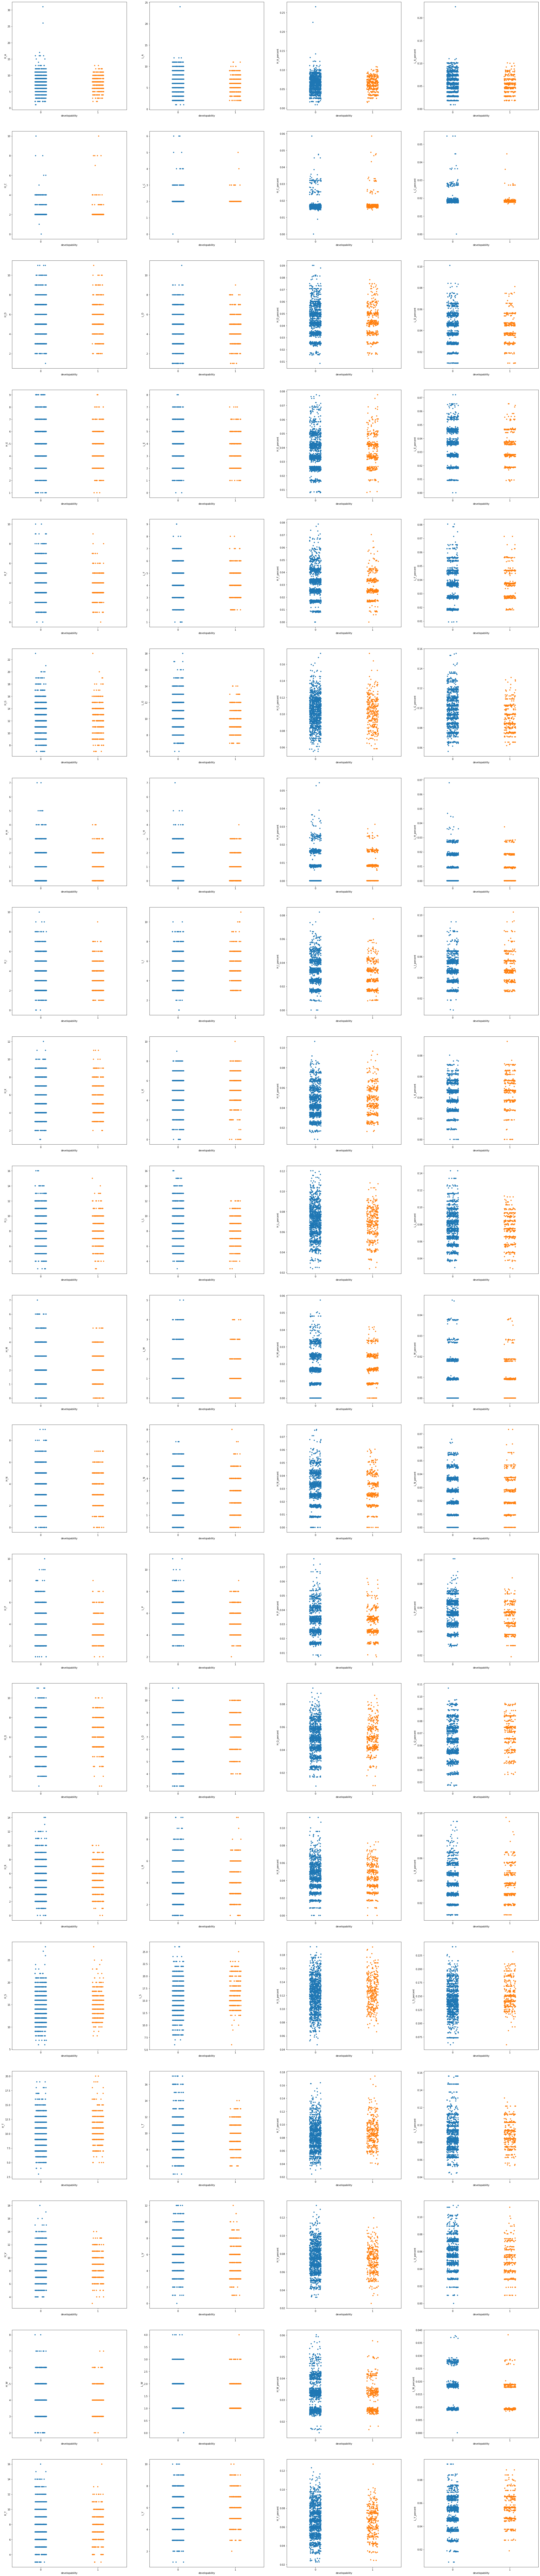

In [18]:
fig, ax = plt.subplots(20,4,figsize=(40,200))
for j, i in enumerate(AAseq):
    sns.stripplot(x="developability", y='H_'+i, data=df,ax=ax[j,0])
    sns.stripplot(x="developability", y='L_'+i, data=df,ax=ax[j,1])
    sns.stripplot(x="developability", y='H_'+i+'_percent', data=df,ax=ax[j,2])
    sns.stripplot(x="developability", y='L_'+i+'_percent', data=df,ax=ax[j,3])

Since 70% data are undevelopable, we should focus on the range of distribution, NOT the occurence distribution. The range between developable antibody and undevelopable antibody is very small. In other words, they have very similar range and it is hard to differentia developable and undevelopable antibody by range. 

Based on the figure above, the largest range difference are related to amino acids:
- A, H, I, and S in both chains
- G, L, and T in light chain
- M, N, P, Q, R, V, and Y in heveay chain, 

In [19]:
dfGroup = df.groupby('developability').mean()
dfGroup

,heavylength,lightlength,H_A,H_A_percent,L_A,L_A_percent,H_C,H_C_percent,L_C,L_C_percent,...,L_V,L_V_percent,H_W,H_W_percent,L_W,L_W_percent,H_Y,H_Y_percent,L_Y,L_Y_percent
developability,,,,,,,,,,,,,,,,,,,,,
0,121.142971,108.791534,7.634185,0.063005,5.999201,0.055296,2.123003,0.017488,2.064696,0.018989,...,6.095847,0.055884,4.008786,0.033079,1.611022,0.014833,8.010383,0.066157,5.523962,0.050827
1,120.629412,108.414706,7.458824,0.061831,5.664706,0.052280,2.205882,0.018068,2.038235,0.018806,...,5.205882,0.047866,3.882353,0.032228,1.514706,0.013964,7.823529,0.064936,5.941176,0.054767


Check is the mean value of proportion of each amino acid in developable antibody is within the 95% confidence interval of undevelopable antibody:

In [20]:
for j, i in enumerate(AAseq):
    lb, ub =np.percentile(df.loc[df['developability']==0,'H_'+i+'_percent'],[2.5,97.5])  # 95% confidence interval 
    if lb<=dfGroup.loc[1,'H_'+i+'_percent']<=ub:
        pass
    else:
        print('Amino Acid: ', i)
print('finish!')

finish!


So all mean value of proportion of each amino acid in developable antibody is within the one in undevelopable antibody.

Therefore, we cannot use mean value of proportion of each amino acid to evalute developability of antibody!

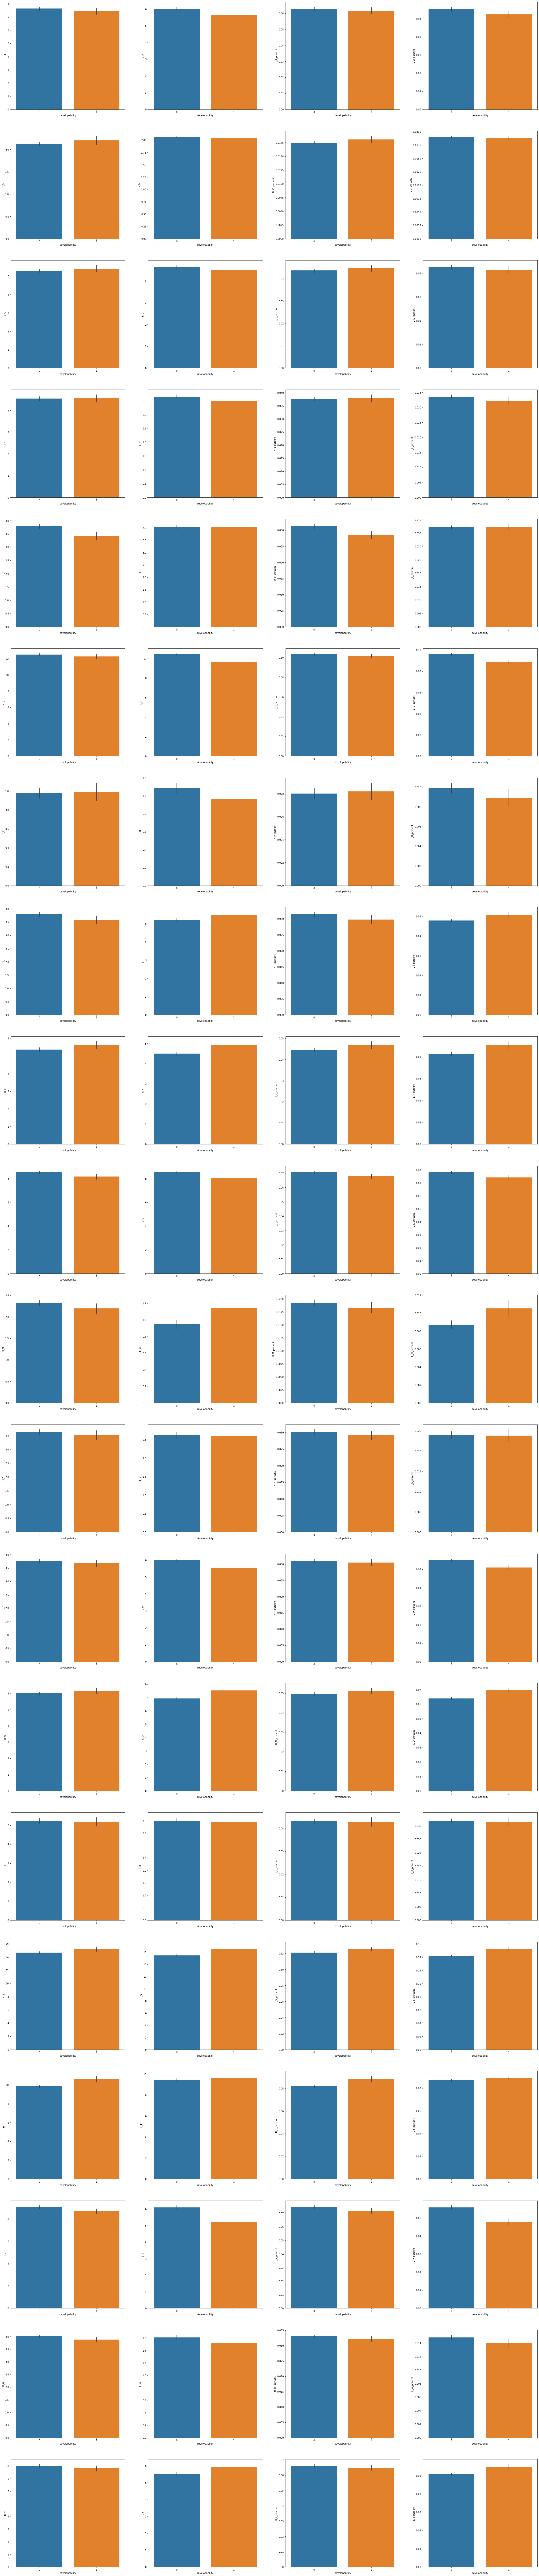

In [21]:
fig, ax = plt.subplots(20,4,figsize=(40,200))
for j, i in enumerate(AAseq):
    sns.barplot(x="developability", y='H_'+i, data=df,ax=ax[j,0])
    sns.barplot(x="developability", y='L_'+i, data=df,ax=ax[j,1])
    sns.barplot(x="developability", y='H_'+i+'_percent', data=df,ax=ax[j,2])
    sns.barplot(x="developability", y='L_'+i+'_percent', data=df,ax=ax[j,3])


# 6.Conclusion

In the above procedures, the proportion and occurence of each amino acid in heavy chain and light chain of antibody has been analysized. It is very hard to estimate the developability of antibody through the distribution of proportion or occurence of each amino acid in antibody.

To my knowledge of chemistry, it is the sequence itself that determines chemical properties and physical properties. Therefore, common EDA methods are very hard to show the pattern of sequence. Because histogram, lineplot, scatter plot are either suitable for numeric values, or cannot display the sequence of amino acids.